In [ ]:
# Install required libraries
!pip install wordcloud imbalanced-learn nltk gradio

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import gradio as gr

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load dataset
df = pd.read_csv('/content/reviews.csv')

In [ ]:
import pandas as pd
# Clean rating column
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# df.dropna(subset=['rating'], inplace=True)
# df['rating'] = df['rating'].astype(int)
# The 'rating' column was not found in the dataset, and a 'sentiment' column already exists.
# Therefore, these steps are not needed with the current dataset structure.


In [ ]:
# Map sentiment
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'

    else:
        return 'Negative'

# df['sentiment'] = df['rating'].apply(map_sentiment) # Commented out as 'rating' column does not exist
# The 'sentiment' column already exists in the DataFrame, so no mapping from 'rating' is needed.
# If further standardization of the existing 'sentiment' column is required (e.g., handling 'neutral' or casing),
# a different mapping function would be necessary for the 'sentiment' column itself.
# For now, we will proceed with the existing 'sentiment' column as is.

In [ ]:
# Enhanced preprocessing to preserve negations
lemmatizer = WordNetLemmatizer()
custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'nor', 'never'}

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]
    return ' '.join(words)

df['cleaned_review'] = df['review_text'].apply(clean_text)

In [ ]:
# Vectorization using TF-IDF with bigrams
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



In [ ]:
# Logistic Regression model with balanced weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       667
     neutral       1.00      1.00      1.00       667
    positive       1.00      1.00      1.00       667

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



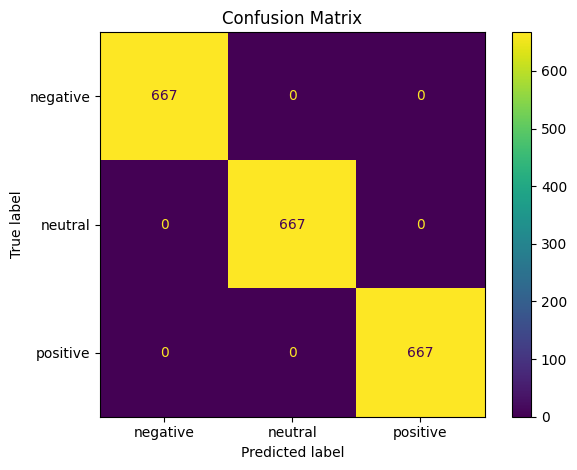

In [ ]:

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [ ]:
# Sentiment prediction function
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    return model.predict(vectorized)[0]



In [ ]:
# Gradio interface
def analyze_sentiment(review):
    sentiment = predict_sentiment(review)
    return f"Predicted Sentiment: {sentiment}"

interface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter a product review here..."),
    outputs="text",
    title="Sentiment Analysis App",
    description="Enter a product review and get the predicted sentiment (Positive or Negative)."
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aedf498f1bcc79176b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
